# Assignment 2: Exploratory Data Analysis and K Nearest Neighbors Classification

For this assignment you will perform exploratory data analysis to visualize wine dataset using Scikit Learn. And, you will explore the bias/variance trade-off by applying k-nearest neighbors classification to the Wine dataset and varying the hyperparameter k.

Documentation for Scikit Learn:
+ The top level documenation page is here: https://scikit-learn.org/stable/index.html
+ The API for the KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
+ The User Guide for KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/neighbors.html#classification
+ Scikit Learn provides many Jupyter notebook examples on how use the toolkit. These Jupyter notebook examples can be run on MyBinder: https://scikit-learn.org/stable/auto_examples/index.html

For more information about the Wine dataset, see this page https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from pandas import DataFrame

##  Load Wine dataset

In [2]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

## Part 1 Exploratory Data Analysis

### Dataset size

In [3]:
print("Number of instances in the wine dataset:", X.shape[0])
print("Number of features in the wine dataset:", X.shape[1])
print("The dimension of the data matrix X is", X.shape)

Number of instances in the wine dataset: 178
Number of features in the wine dataset: 13
The dimension of the data matrix X is (178, 13)


In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

The `y` vector length is 178. It has three unique values: 0, 1 and 2. Each value represents a kine of wine.

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Descriptive statistics

Show the summary table of wine data including min, max, median, and quantiles

In [6]:
y.shape

(178,)

In [7]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [8]:
import numpy as np
import pandas as pd
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
# print(wine['feature_names'] + ['target'])

In [9]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### (TODO) Part 1a Draw box plots

Draw four box plots for attributes: alcohol, malic_acid, ash, alcalinity_of_ash. Use color to show the different target class.

Some links to help you:

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

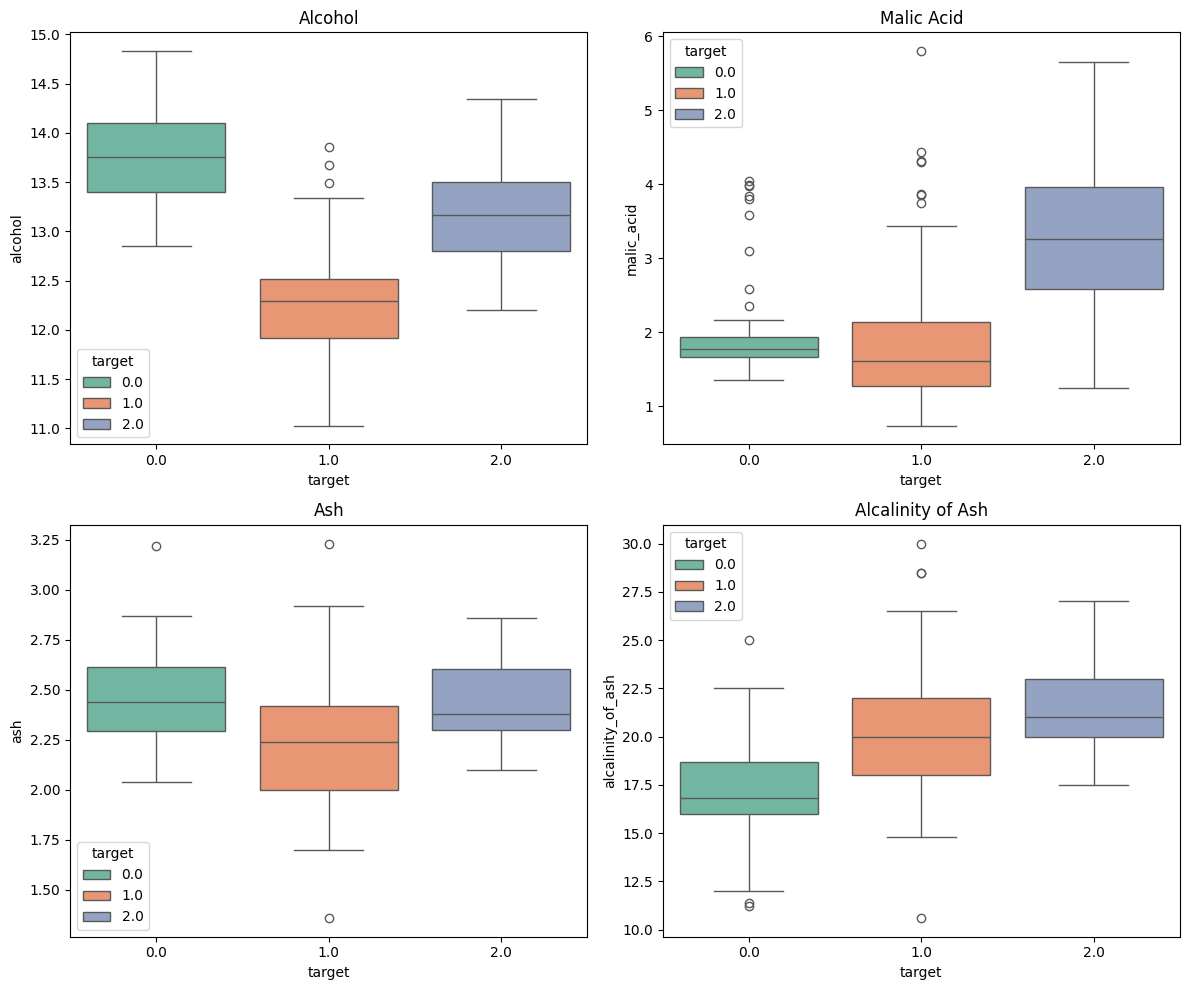

In [13]:
## Insert your code here...
#store the required attributes as list
attr_req = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']

#create the number of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#draw the box plot according to the subplots
plot_index = 0
for attr in attr_req:
  sns.boxplot(x='target', y=attr, data=wine_df, ax=axes[plot_index//2, plot_index%2],
                hue='target', palette='Set2')
  plot_index+=1

#set the corresponding titles
axes[0, 0].set_title('Alcohol')
axes[0, 1].set_title('Malic Acid')
axes[1, 0].set_title('Ash')
axes[1, 1].set_title('Alcalinity of Ash')

#set the layout to make it visually more appealing
plt.tight_layout()
# plt.show()


### (TODO) Part 1b
Based on the box plots, if you were only allowed to choose one attribute which attribute would you choose? Whay?

**SOLUTION:**

My choice would be 'alcohol' attribute because of the following reasons.

1. Minimal overlapping region - For the 'alcohol' attribute the inter quartile regions of target classes are less overlapped and the medians are clearly distinct compared to that of other attributes.

2. Less number of outliers - Moreover, the number of outliers are also less compared to that of others.

The above reasons suggests that the 'alcohol' attribute is a good discriminator.


### (TODO) Part 1c Scatter plots

Generate [scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) using each pair of the first 4 attributes (alcohol, malic_acid, ash, alcalinity_of_ash) as axis. You should generate $6 = {4 \choose 2}$ scatter plots.

Note: use the smaller index attribute as x axis and the larger one as y axis. eg. for pair (alcohol, malic_acid), alcohol is the x axis and malic_acid is y axis.

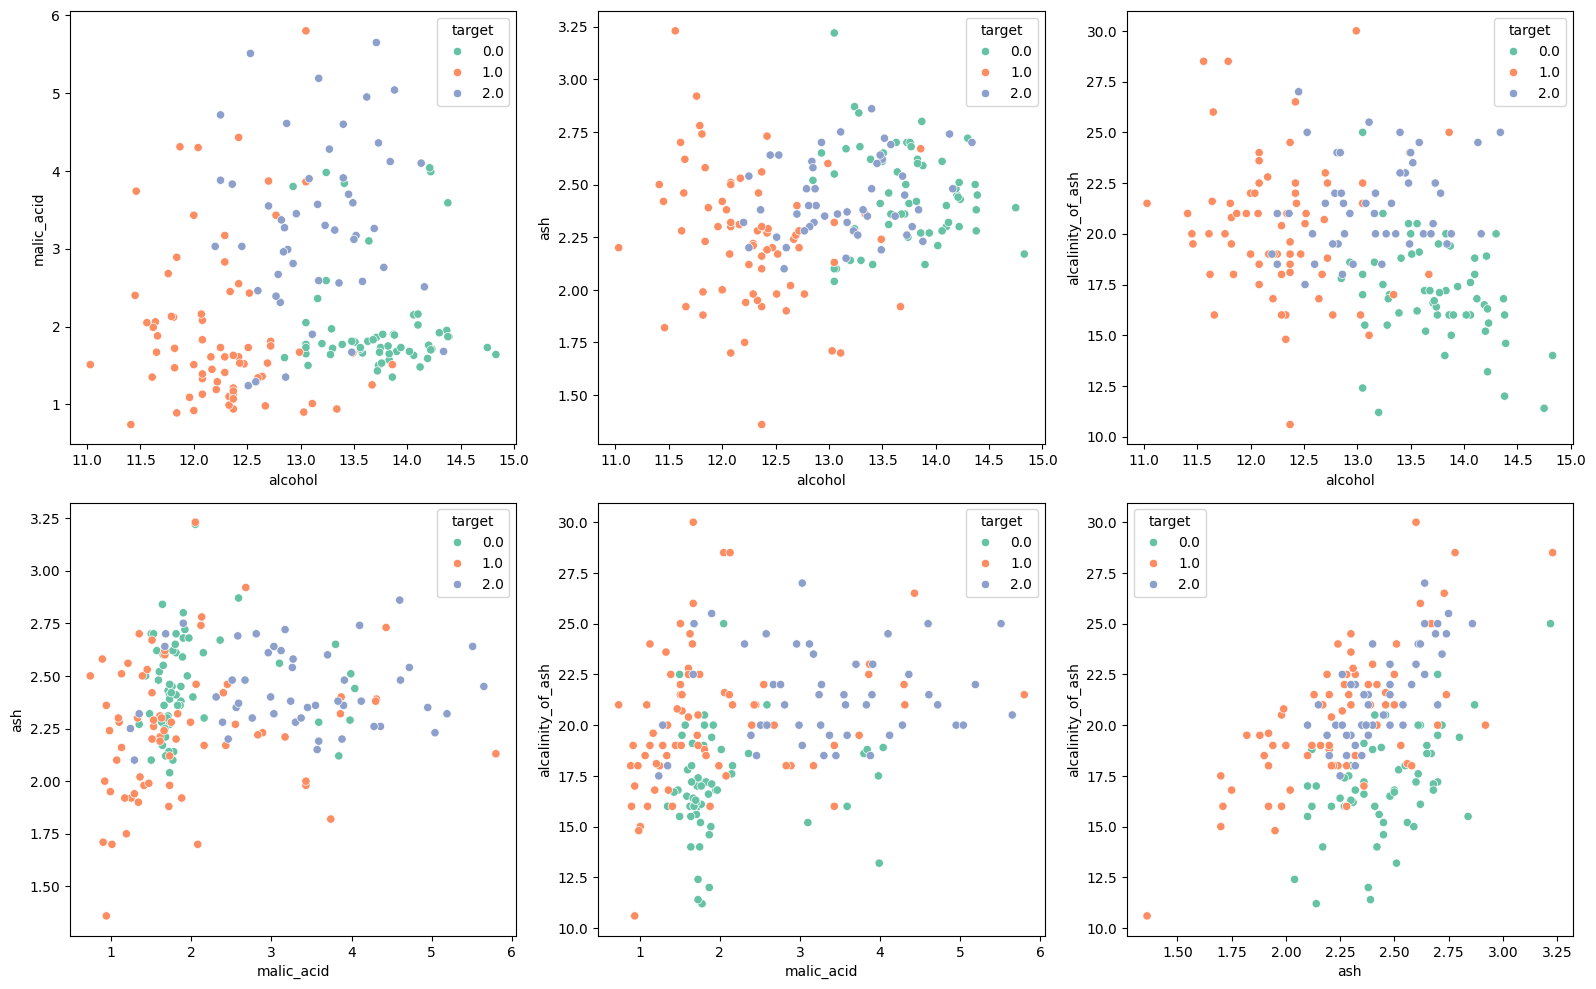

In [14]:
## Insert your answer here...
#required attributes
attr_req = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']

#creating the 4C2 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

#Using smaller index attribute as x-axis and larger index attribute as y-axis
plot_index = 0
for x_index in range(len(attr_req)-1):
  for y_index in range(x_index+1,len(attr_req)):
    sns.scatterplot(x=attr_req[x_index], y=attr_req[y_index], data=wine_df,
                ax=axes[plot_index//3, plot_index%3], hue='target', palette='Set2', legend=True)
    plot_index+=1

#set the layout to make it visually more appealing
plt.tight_layout()


In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


#required attributes
attr_req = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']

print("ACCURACY:")
for x_index in range(len(attr_req)-1):
  for y_index in range(x_index+1,len(attr_req)):
    #creating a linear SVM Model
    svm_model = LinearSVC(max_iter=40000)
    #Fit model on train data
    svm_model.fit(wine_df[[attr_req[x_index], attr_req[y_index]]], wine_df.target)
    #Predicting the model on test data
    y_pred = svm_model.predict(wine_df[[attr_req[x_index], attr_req[y_index]]])
    #accuracy of the model
    accuracy = accuracy_score(y, y_pred)
    print(f'{attr_req[x_index]} vs {attr_req[y_index]} -- {accuracy} ')





ACCURACY:
alcohol vs malic_acid -- 0.7640449438202247 
alcohol vs ash -- 0.6685393258426966 
alcohol vs alcalinity_of_ash -- 0.7078651685393258 
malic_acid vs ash -- 0.5842696629213483 
malic_acid vs alcalinity_of_ash -- 0.6797752808988764 
ash vs alcalinity_of_ash -- 0.6629213483146067 


### (TODO) Part 1d
If you were to draw linear decision boundaries to separate the classes, which scatter plot from 1c do you think will have the least error and which the most?

**SOLUTION:**

If we were to draw linear decision boundaries,

First Scatter Plot **(alcohol on x-axis and malic_acid on y-axis)** will have the least error because of the following reasons.
1. Classes of the first scatter plot can easily be segregated compared to that of other scatter plots mentioned in **1c**.
2. Using the Linear SVC, we obtain the highest accuracy for the segregation of classes.

Fourth Scatter Plot **(malic_acid on x-axis and ash on y-axis)** will have the most error because of the following reasons.
1. Classes of the fourth scatter plot can't be easily segregated compared to that of other scatter plots mentioned in **1c**.
2. Using the Linear SVC, we obtain the lowest accuracy for the segregation of classes.


### (TODO) Part 1e PCA
Scatter plots using two attributes of the data are equivalent to project the four dimensional data down to two dimensions using axis-parallel projection. Principal component analysis (PCA) is a technique to linearly project the data to lower dimensions that are not necessarily axis-parallel. Use PCA to project the data down to two dimensions.

Documentation for PCA:
+ API https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
+ User guide https://scikit-learn.org/stable/modules/decomposition.html#pca

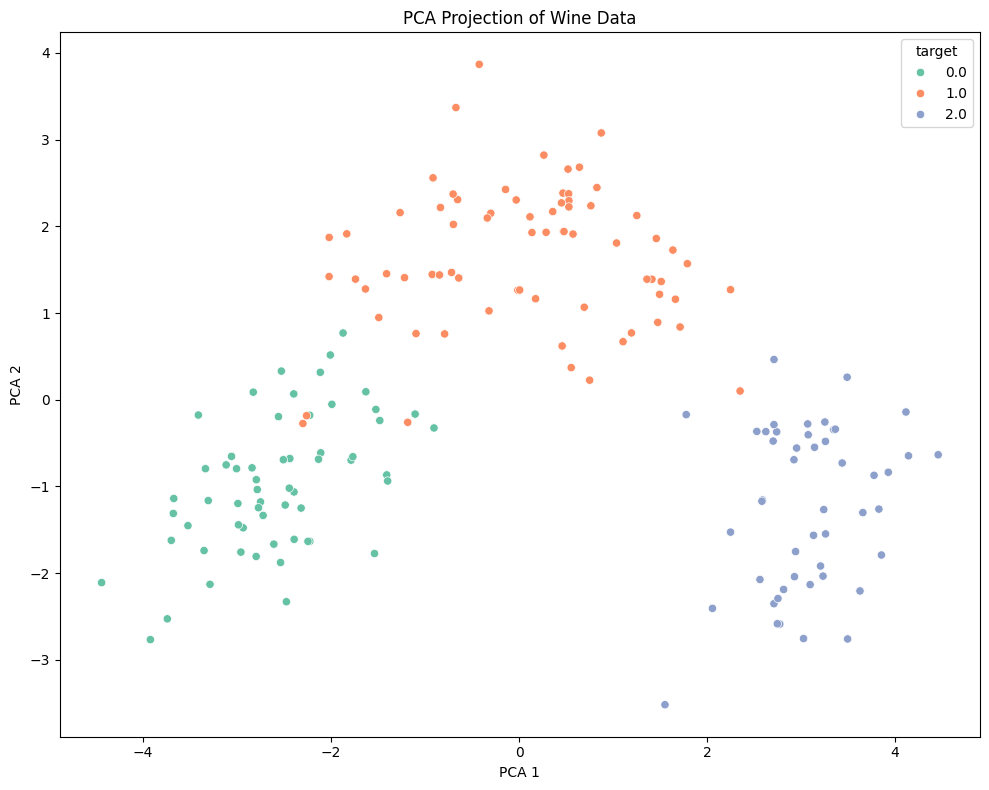

In [16]:
### Insert your code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardization of dataset
wine_std = pd.DataFrame(StandardScaler().fit_transform(wine_df))

# Initializing PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
pca_res = pca.fit_transform(wine_std)

# Creating a DataFrame with the pca_res
pca_df = pd.DataFrame(data=pca_res, columns=['PCA 1','PCA 2'])

# Concatenate the PCA results with the target class
pca_df['target'] = wine_df['target']

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='target', data=pca_df, palette='Set2')
plt.title('PCA Projection of Wine Data')
plt.tight_layout()
# plt.show()

### (TODO) Part 1f
In the case of the Wine dataset, does PCA do a better job of separating the classes?

Yes, PCA(Principle Component Analysis) does a better job in seperating the classes as it normalizes/standardizes the data. In part 1e, using PCA we have done dimensionality reduction to 2 components and the classes are well seperated. There is less scattering and mixing at the group boundaries. So, the PCA does a better job in seperating the classes.

## Part 2 K Nearest Neighbor

Split the dataset into train set and test set. Use 70 percent of the dataset for training, and use 30 percent for testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [18]:
print("Number of instances in the train set:", X_train.shape[0])
print("Number of instances in the test set:", X_test.shape[0])

Number of instances in the train set: 124
Number of instances in the test set: 54


### (TODO) Part 2a Training a KNN classifer

Create a KNeighborsClassifier with `n_neighbors = 3`. And, train the classifier using the train set.

In [19]:
### Insert you answer here
from sklearn.neighbors import KNeighborsClassifier

# Creating a knn classifier with 3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Training the classifier with train data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### (TODO) Part 2b Tuning hyperparameter k
As we have seen in class, hyperparameter k of the K Nearest Neighbors classification affects the inductive bias. For this part train multiple near neighbor classifier models, store the results in a DataFrame. The plot plot training error and testing error versus N/k, where N = 100 and k are given in the k_list below.

In [20]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

    k  Training Error  Testing Error
0   1        0.000000       0.203704
1   3        0.161290       0.259259
2   5        0.225806       0.259259
3   7        0.209677       0.240741
4   9        0.258065       0.277778
5  11        0.274194       0.259259
6  13        0.266129       0.240741
7  15        0.274194       0.240741
8  50        0.314516       0.203704


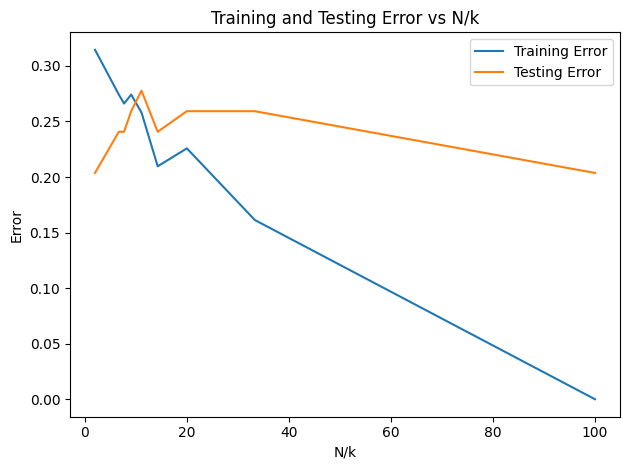

In [21]:
### Insert your code
# Use the `result` to store the DataFrame

# Considering X_train, X_test, y_train, y_test from previous steps
# k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]
result = pd.DataFrame(columns=['k', 'Training Error', 'Testing Error'])

# Given N value
N = 100

for k in k_list:
    # Creating a Knn Classifier based on the value of 'k'
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Training the classifier with train data
    knn_classifier.fit(X_train, y_train)

    # Predicting the values of train and test data
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)

    # Accuracy calculation for train and test data
    train_accuracy = 1 - accuracy_score(y_train, y_train_pred)
    test_accuracy = 1 - accuracy_score(y_test, y_test_pred)

    # Appending results to the DataFrame
    result = pd.concat([result, pd.DataFrame({'k': [k], 'Training Error':
     [train_accuracy], 'Testing Error': [test_accuracy]})], ignore_index=True)

# Plot training error and testing error versus N/k
plt.plot(N/result['k'], result['Training Error'], label='Training Error')
plt.plot(N/result['k'], result['Testing Error'], label='Testing Error')
plt.xlabel('N/k')
plt.ylabel('Error')
plt.title('Training and Testing Error vs N/k')
plt.legend()
plt.tight_layout()
# plt.show()

# Display the result DataFrame
print(result)

### (TODO) Part 2c Decision boundaries

Plot decision boundaries of K Nearest Neighbors.

Use Scikit Learn's [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) class to visualize the nearest neighbor boundaries as k is varied.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay

In [22]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

Simplify the problem by using only the first 2 attributes of the dataset

In [23]:
X2 = wine.data[:, :2]

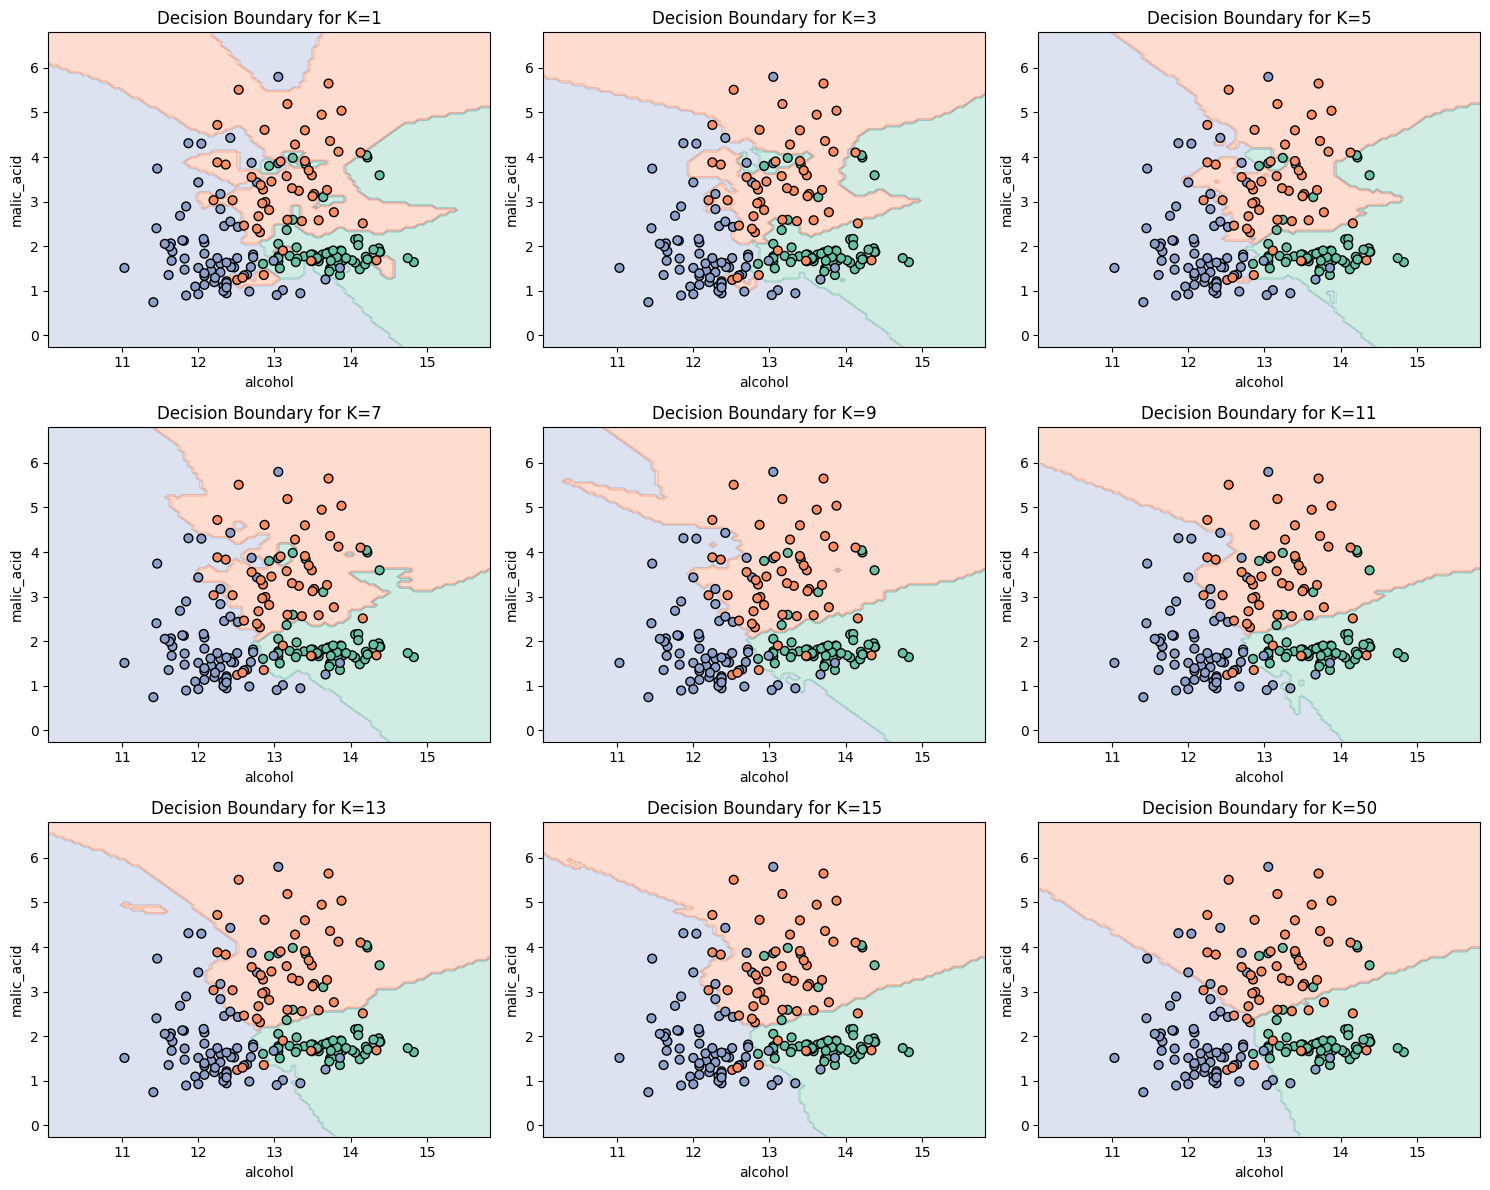

In [35]:
### Insert your code here

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Setting subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()
i = 0

for k in k_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2, y)

    # Define a custom color map
    custom_cmap = ListedColormap(['#66c2a5', '#8da0cb', '#fc8d62'])

    # Plot decision boundaries using DecisionBoundaryDisplay
    disp = DecisionBoundaryDisplay.from_estimator(knn, X2, alpha=0.3,
         ax=ax[i], xlabel=wine.feature_names[0], ylabel=wine.feature_names[1],
               cmap=custom_cmap)

    # Scatter plot for data points
    disp.ax_.scatter(X2[:, 0], X2[:, 1], c=y, cmap=custom_cmap, edgecolor='k',
    s=40)
    ax[i].set_title(f"Decision Boundary for K={k}")
    i += 1

# Adjust the layout for better visual representation avoiding overlaps of graphs
plt.tight_layout()
